In [189]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [91]:
# Loading the file

cb = pd.read_csv("/content/customer_booking.csv", encoding='ISO-8859-1')

In [92]:
# checking the head
cb.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [93]:
# Checking the Info
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [94]:
# Check value counts for each column
cb['num_passengers'].value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [95]:
cb['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [96]:
cb['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [97]:
cb['purchase_lead'].value_counts()

1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: purchase_lead, Length: 470, dtype: int64

In [98]:
cb['length_of_stay'].value_counts()

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: length_of_stay, Length: 335, dtype: int64

In [99]:
cb['flight_hour'].value_counts()

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64

In [100]:
cb['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [101]:
cb['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [102]:
cb['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [103]:
cb['wants_extra_baggage'].value_counts()

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

In [104]:
cb['wants_preferred_seat'].value_counts()

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

In [105]:
cb['wants_in_flight_meals'].value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [106]:
cb['flight_duration'].value_counts()

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, dtype: int64

In [107]:
cb['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [108]:
# Checking for duplicates

cb.duplicated().sum()

719

In [109]:
# Removing the duplicates

cb = cb.drop_duplicates()

In [110]:
cb.duplicated().sum()

0

In [111]:
# EDA - Exploratory Data Analysis

#1st Business Moment : Measures of Central Tendency -> Mean, Median, Mode

cb.mean()

<ipython-input-111-60e931a7af38>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cb.mean()


num_passengers            1.590187
purchase_lead            84.723281
length_of_stay           23.053976
flight_hour               9.070676
wants_extra_baggage       0.668229
wants_preferred_seat      0.295631
wants_in_flight_meals     0.426635
flight_duration           7.279974
booking_complete          0.149977
dtype: float64

In [112]:
cb.median()

<ipython-input-112-c67dc1f1c85b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cb.median()


num_passengers            1.00
purchase_lead            51.00
length_of_stay           17.00
flight_hour               9.00
wants_extra_baggage       1.00
wants_preferred_seat      0.00
wants_in_flight_meals     0.00
flight_duration           7.57
booking_complete          0.00
dtype: float64

In [113]:
cb.mode()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,1,6,8,Mon,AKLKUL,Australia,1,0,0,8.83,0


In [114]:
#2nd Business Moment : Measures of Dispersion -> Variance, Standard Deviation, Range

cb.var() == 0

<ipython-input-114-01855d5c29a7>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cb.var() == 0


num_passengers           False
purchase_lead            False
length_of_stay           False
flight_hour              False
wants_extra_baggage      False
wants_preferred_seat     False
wants_in_flight_meals    False
flight_duration          False
booking_complete         False
dtype: bool

In [115]:
cb.std()

<ipython-input-115-0d07e1afc326>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cb.std()


num_passengers            1.016538
purchase_lead            90.410229
length_of_stay           33.832149
flight_hour               5.413099
wants_extra_baggage       0.470854
wants_preferred_seat      0.456331
wants_in_flight_meals     0.494593
flight_duration           1.496390
booking_complete          0.357052
dtype: float64

In [116]:
cb.max()

num_passengers                   9
sales_channel               Mobile
trip_type                RoundTrip
purchase_lead                  867
length_of_stay                 778
flight_hour                     23
flight_day                     Wed
route                       URTXIY
booking_origin             Vietnam
wants_extra_baggage              1
wants_preferred_seat             1
wants_in_flight_meals            1
flight_duration                9.5
booking_complete                 1
dtype: object

In [117]:
cb.min()

num_passengers                    1
sales_channel              Internet
trip_type                CircleTrip
purchase_lead                     0
length_of_stay                    0
flight_hour                       0
flight_day                      Fri
route                        AKLDEL
booking_origin            (not set)
wants_extra_baggage               0
wants_preferred_seat              0
wants_in_flight_meals             0
flight_duration                4.67
booking_complete                  0
dtype: object

In [118]:
# Range of max-min
# cb['num_passengers'] 9-1 = 8
# cb['flight_duration'] = 4.83
9.5-4.67

4.83

In [119]:
# 3rd Business Moment : Measures of Skewness
cb.skew()

<ipython-input-119-1cfdcca40640>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cb.skew()


num_passengers           2.688095
purchase_lead            1.656817
length_of_stay           5.296476
flight_hour              0.398141
wants_extra_baggage     -0.714599
wants_preferred_seat     0.895741
wants_in_flight_meals    0.296680
flight_duration         -0.362110
booking_complete         1.960708
dtype: float64

In [120]:
# 4th Business Moment : Measures of Kurtosis
cb.kurt()

<ipython-input-120-17796f0beff3>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cb.kurt()


num_passengers           10.076058
purchase_lead             2.501577
length_of_stay           49.365201
flight_hour              -0.299858
wants_extra_baggage      -1.489408
wants_preferred_seat     -1.197696
wants_in_flight_meals    -1.912059
flight_duration          -1.372584
booking_complete          1.844451
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2cbaf08d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2cbaf09240>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2cbaf08a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7d2cbaf09780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d2cbaf09a20>],
 'means': []}

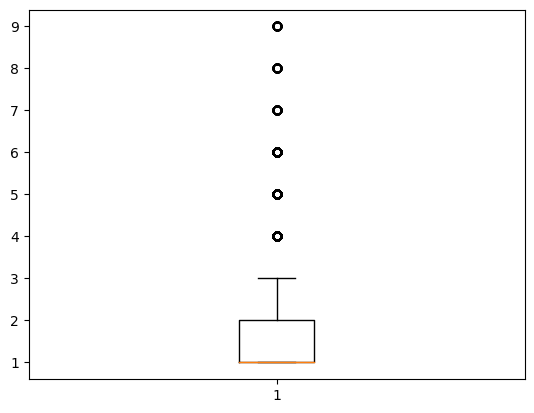

In [121]:
# Graphical Representation - Outliers

plt.boxplot(cb['num_passengers'])

In [122]:
!pip install feature_engine

<Axes: ylabel='num_passengers'>

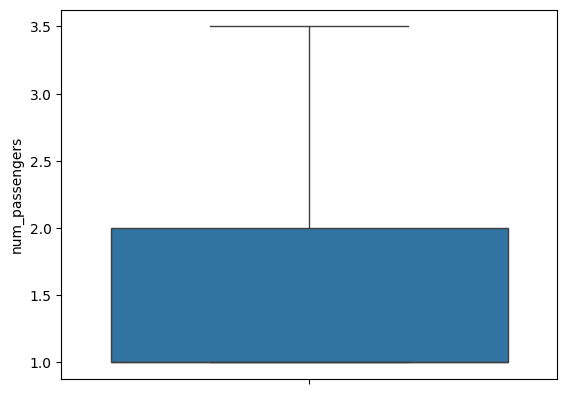

In [123]:
# Removing the outliers by using Winsorizer - iqr
from feature_engine.outliers import Winsorizer

winsor_iqr = Winsorizer(capping_method='iqr',
                          tail = 'both',
                           fold = 1.5,
                            variables=('num_passengers'))

data_i = winsor_iqr.fit_transform(cb[['num_passengers']], )

sns.boxplot(data_i.num_passengers)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2cbada0c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2cbada1180>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2cbada09a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d2cbada16c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d2cbada1960>],
 'means': []}

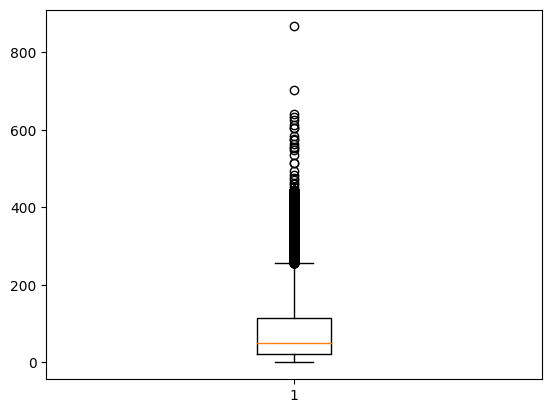

In [124]:
plt.boxplot(cb['purchase_lead'])

<Axes: ylabel='purchase_lead'>

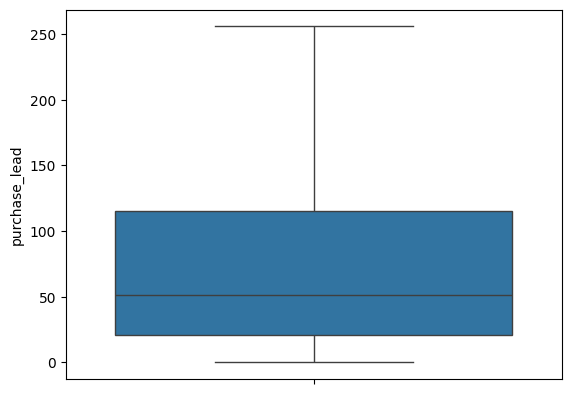

In [125]:
winsor_iqr = Winsorizer(capping_method='iqr',
                          tail = 'both',
                           fold = 1.5,
                            variables=('purchase_lead'))

data_i = winsor_iqr.fit_transform(cb[['purchase_lead']], )

sns.boxplot(data_i.purchase_lead)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2cbb4fc5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2cbb4fe740>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2cbb4febc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d2cbb4fd1b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d2cbb4fcc10>],
 'means': []}

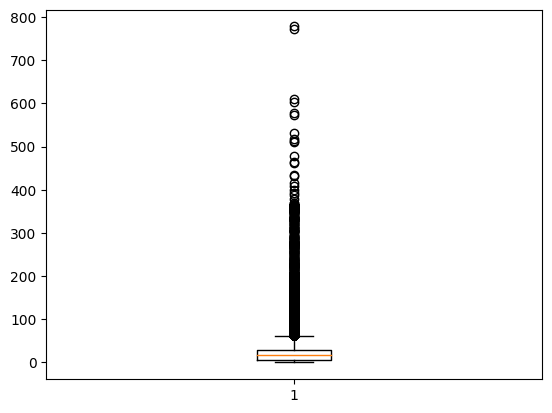

In [126]:
plt.boxplot(cb['length_of_stay'])

<Axes: ylabel='length_of_stay'>

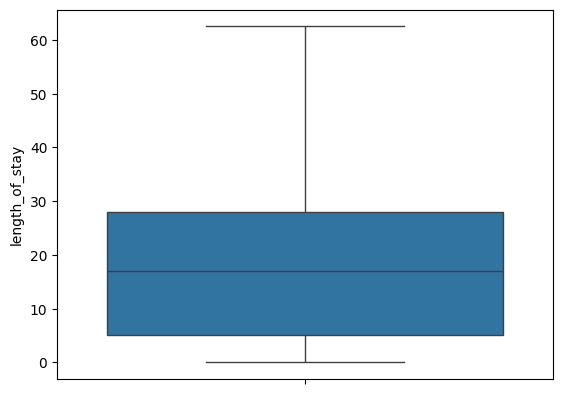

In [127]:
winsor_iqr = Winsorizer(capping_method='iqr',
                          tail = 'both',
                           fold = 1.5,
                            variables=('length_of_stay'))

data_i = winsor_iqr.fit_transform(cb[['length_of_stay']], )

sns.boxplot(data_i.length_of_stay)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2cbb41eb30>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2cbb41f940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2cbb41ed10>],
 'medians': [<matplotlib.lines.Line2D at 0x7d2cbb5abd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d2cbb5aa470>],
 'means': []}

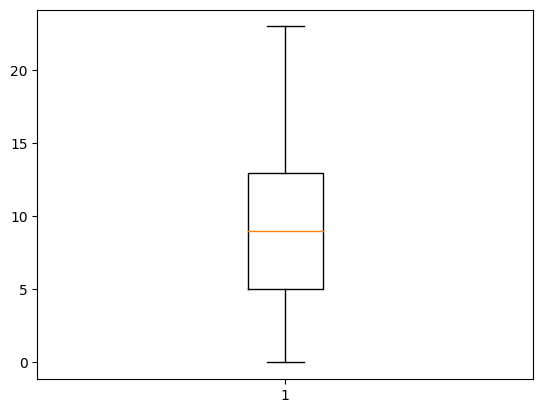

In [128]:
plt.boxplot(cb['flight_hour']) # Clean without Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2cbb5745b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2cbb575360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2cbb576500>],
 'medians': [<matplotlib.lines.Line2D at 0x7d2cbb575120>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d2cbb5775b0>],
 'means': []}

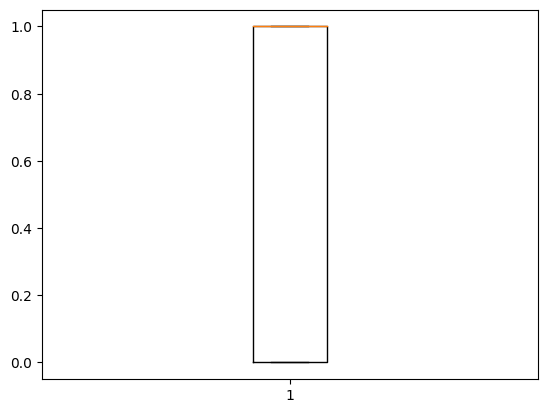

In [129]:
plt.boxplot(cb['wants_extra_baggage']) # Clean without Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2cbb54f190>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2cbb54f100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2cbb54e6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d2cbb54ed70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d2cbb54e770>],
 'means': []}

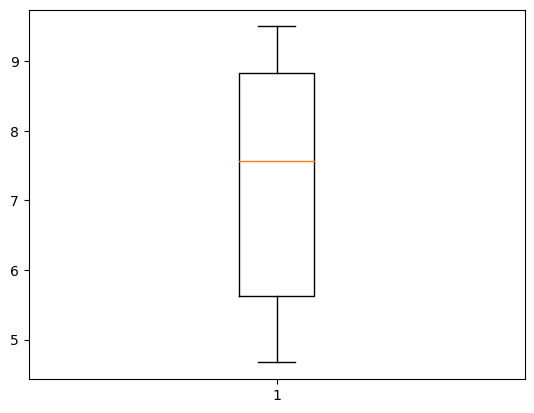

In [130]:
plt.boxplot(cb['flight_duration']) # Clean without Outliers

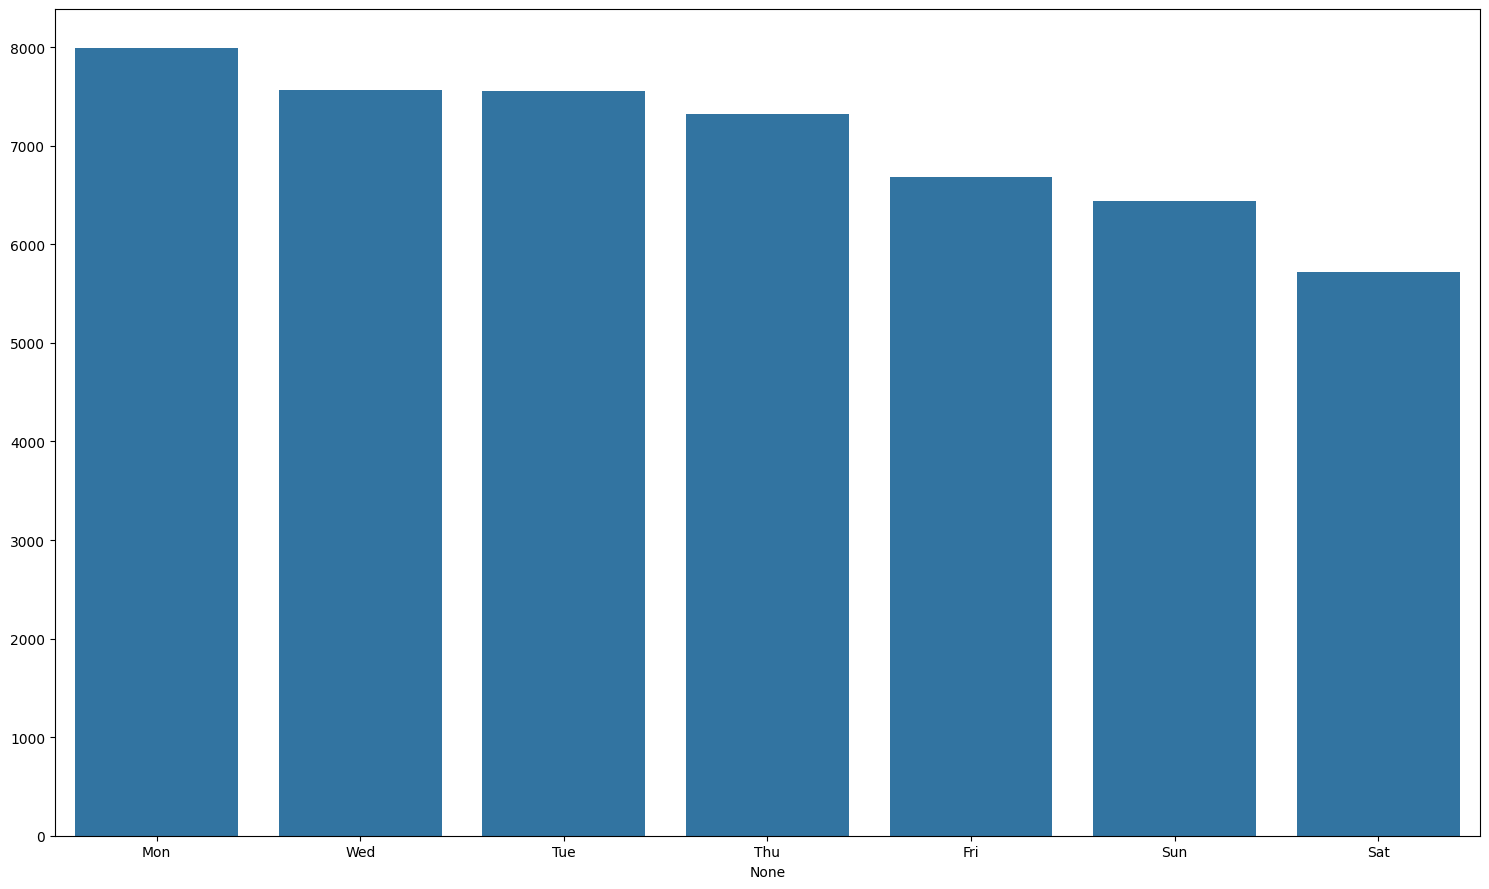

In [131]:
# Flight Days Analysis

plt.figure(figsize = (15, 9))
sns.barplot(x=cb['flight_day'].value_counts()[:7].index,y=cb['flight_day'].value_counts()[:7].values)
plt.tight_layout()

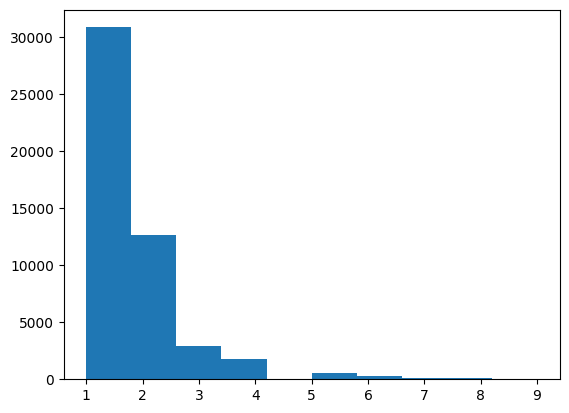

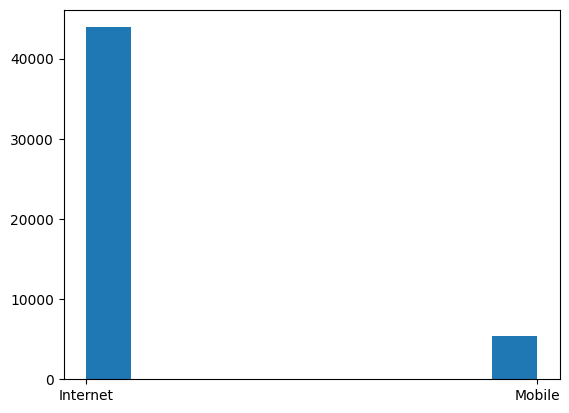

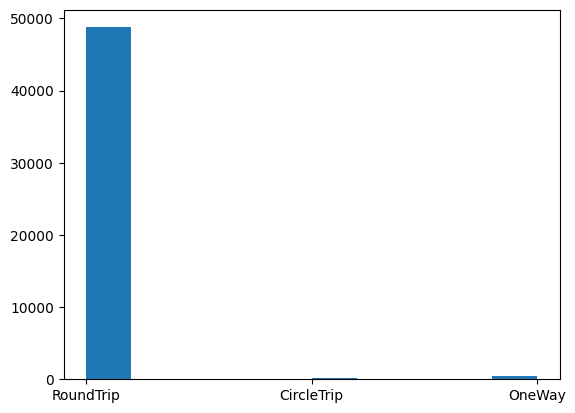

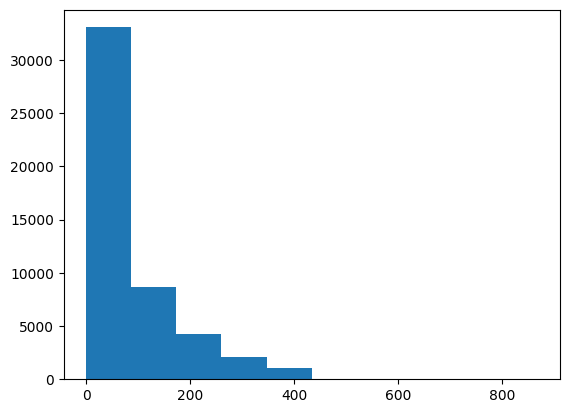

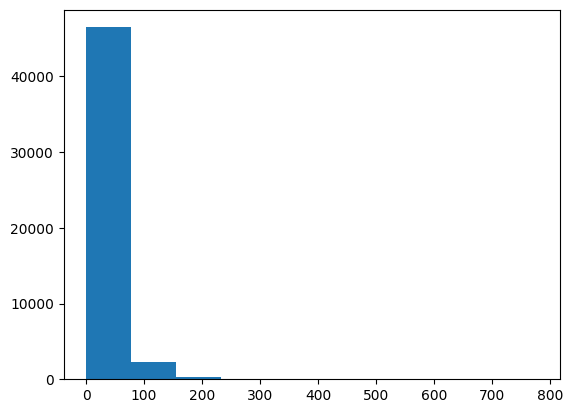

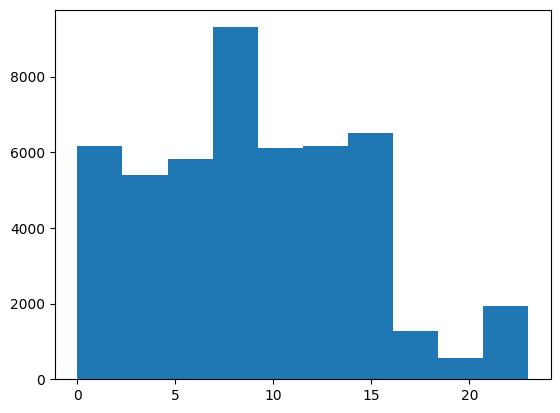

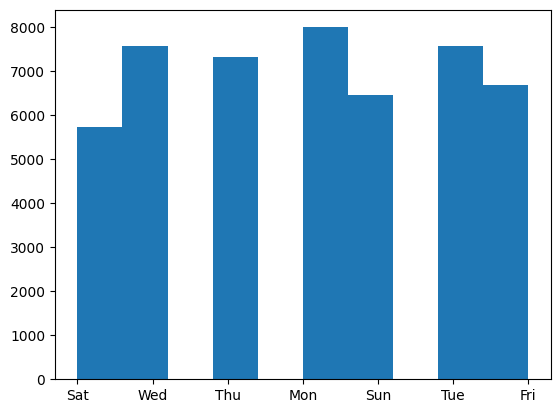

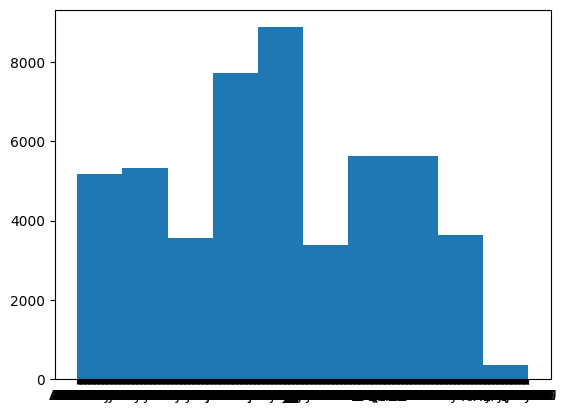

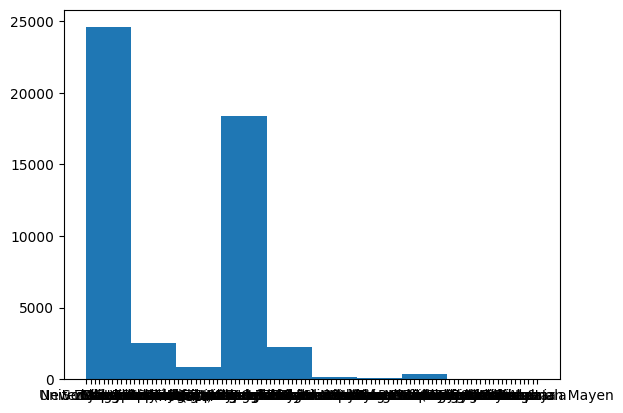

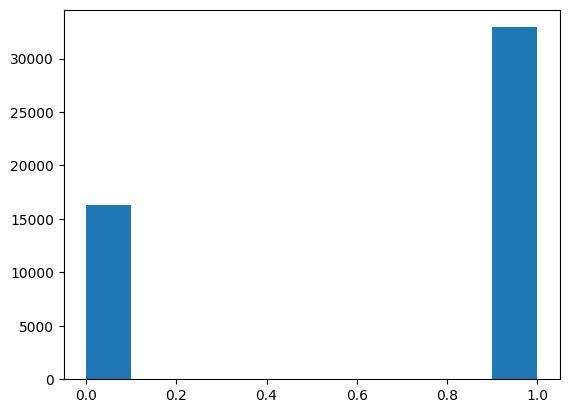

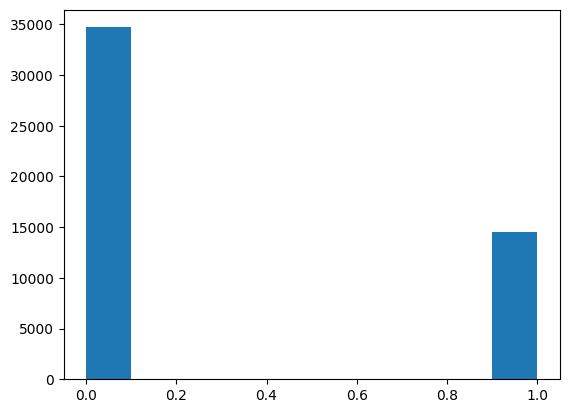

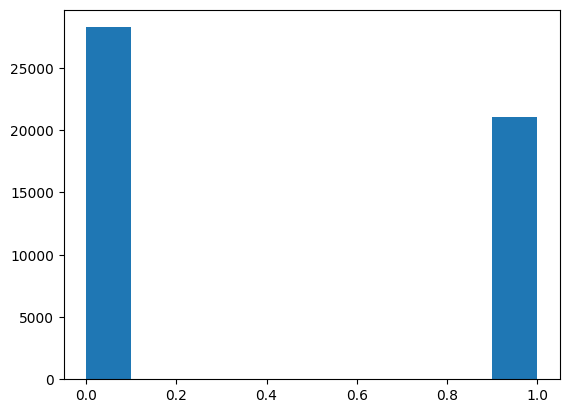

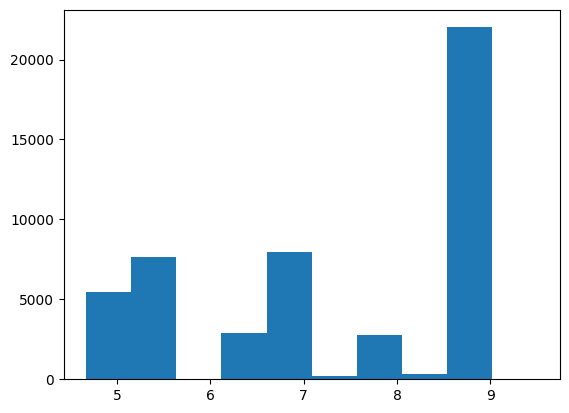

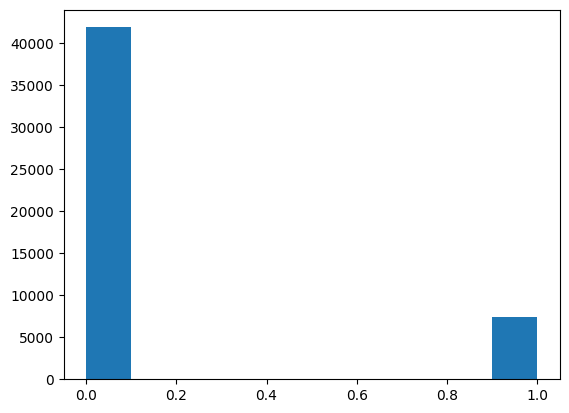

In [132]:
# Histograms

for column in cb.columns:
    plt.hist(cb[column])
    plt.show()

In [133]:
# Analysis
cb.groupby('flight_day').sum()['purchase_lead'].reset_index()

<ipython-input-133-1a0a516495c4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('flight_day').sum()['purchase_lead'].reset_index()


,flight_day,purchase_lead
0,Fri,494340
1,Mon,749968
2,Sat,488154
3,Sun,706301
4,Thu,557417
5,Tue,617374
6,Wed,561694


In [134]:
# Using sort function to get values orderly
result = cb.groupby('flight_day').sum()['purchase_lead'].reset_index()
result_sorted = result.sort_values(by='purchase_lead', ascending=False)
print(result_sorted)

  flight_day  purchase_lead
1        Mon         749968
3        Sun         706301
5        Tue         617374
6        Wed         561694
4        Thu         557417
0        Fri         494340
2        Sat         488154


<ipython-input-134-db9a6bb6eaa9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = cb.groupby('flight_day').sum()['purchase_lead'].reset_index()


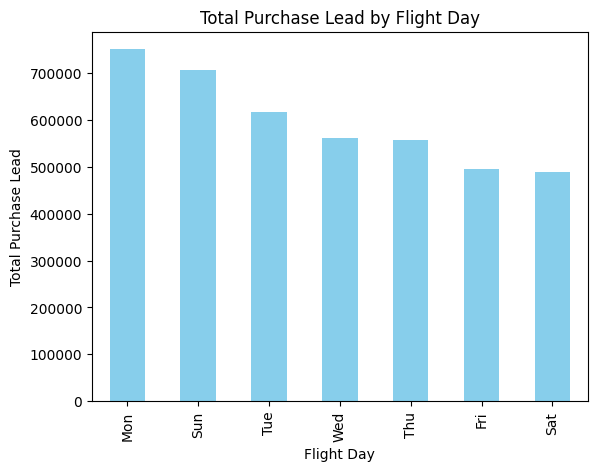

In [135]:
# Plotting
result_sorted.plot(kind='bar', x='flight_day', y='purchase_lead', color='skyblue', legend=False)
plt.title('Total Purchase Lead by Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Total Purchase Lead')
plt.show()

In [136]:
cb.groupby('flight_day').sum()['length_of_stay'].reset_index()

<ipython-input-136-97fc0e2cf5ba>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('flight_day').sum()['length_of_stay'].reset_index()


,flight_day,length_of_stay
0,Fri,155553
1,Mon,179891
2,Sat,132668
3,Sun,145512
4,Thu,171896
5,Tue,176390
6,Wed,174213


In [137]:
# Using sort function to get values orderly
result = cb.groupby('flight_day').sum()['length_of_stay'].reset_index()
result_sorted = result.sort_values(by='length_of_stay', ascending=False)
print(result_sorted)

  flight_day  length_of_stay
1        Mon          179891
5        Tue          176390
6        Wed          174213
4        Thu          171896
0        Fri          155553
3        Sun          145512
2        Sat          132668


<ipython-input-137-ebaf1fa8ad66>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = cb.groupby('flight_day').sum()['length_of_stay'].reset_index()


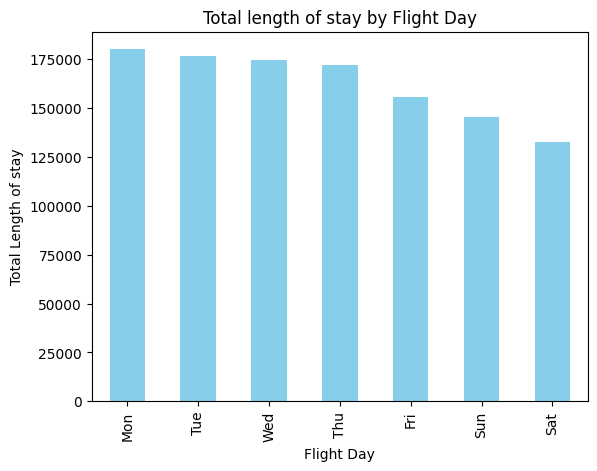

In [138]:
# Plotting
result_sorted.plot(kind='bar', x='flight_day', y='length_of_stay', color='skyblue', legend=False)
plt.title('Total length of stay by Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Total Length of stay')
plt.show()

In [139]:
cb.groupby('flight_day').sum()['flight_hour'].reset_index()

<ipython-input-139-f03ad55980fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('flight_day').sum()['flight_hour'].reset_index()


,flight_day,flight_hour
0,Fri,58668
1,Mon,71848
2,Sat,51451
3,Sun,62729
4,Thu,65884
5,Tue,68230
6,Wed,68202


In [140]:
# Using sort function to get values orderly
result = cb.groupby('flight_day').sum()['flight_hour'].reset_index()
result_sorted = result.sort_values(by='flight_hour', ascending=False)
print(result_sorted)

  flight_day  flight_hour
1        Mon        71848
5        Tue        68230
6        Wed        68202
4        Thu        65884
3        Sun        62729
0        Fri        58668
2        Sat        51451


<ipython-input-140-0240278ebdd0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = cb.groupby('flight_day').sum()['flight_hour'].reset_index()


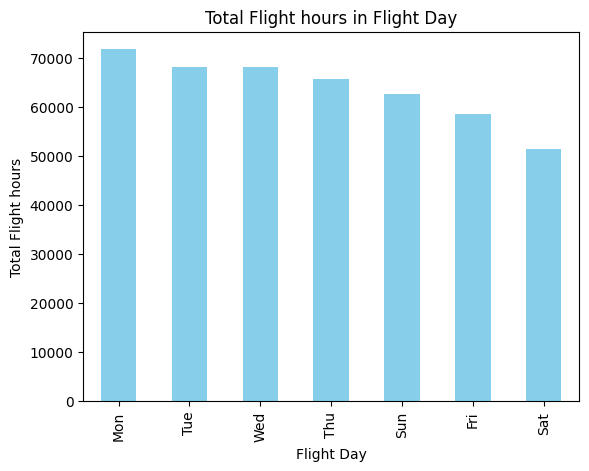

In [141]:
# Plotting
result_sorted.plot(kind='bar', x='flight_day', y='flight_hour', color='skyblue', legend=False)
plt.title('Total Flight hours in Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Total Flight hours')
plt.show()

In [142]:
# num_passengers column with flight_hour
cb.groupby('flight_day').sum()['num_passengers'].reset_index()

<ipython-input-142-7a416f943c1d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('flight_day').sum()['num_passengers'].reset_index()


,flight_day,num_passengers
0,Fri,10409
1,Mon,12750
2,Sat,9240
3,Sun,10631
4,Thu,11548
5,Tue,11873
6,Wed,11915


In [143]:
# Using sort function to get values orderly
result = cb.groupby('flight_day').sum()['num_passengers'].reset_index()
result_sorted = result.sort_values(by='num_passengers', ascending=False)
print(result_sorted)

  flight_day  num_passengers
1        Mon           12750
6        Wed           11915
5        Tue           11873
4        Thu           11548
3        Sun           10631
0        Fri           10409
2        Sat            9240


<ipython-input-143-e0a03ff876bb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = cb.groupby('flight_day').sum()['num_passengers'].reset_index()


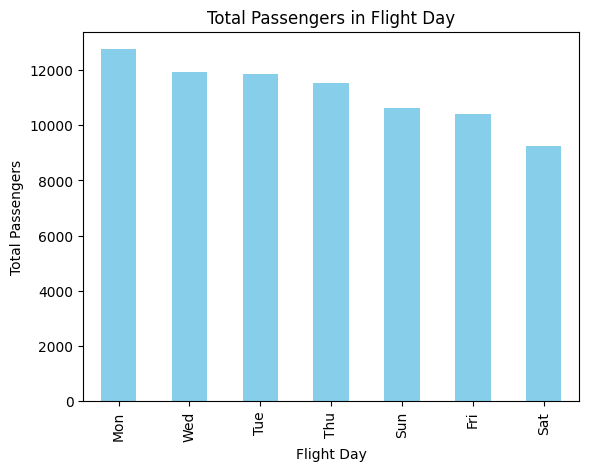

In [144]:
# Plotting
result_sorted.plot(kind='bar', x='flight_day', y='num_passengers', color='skyblue', legend=False)
plt.title('Total Passengers in Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Total Passengers')
plt.show()

In [145]:
# flight_duration with flight_day
cb.groupby('flight_day').sum()['flight_duration'].reset_index()

<ipython-input-145-7988d09015e0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('flight_day').sum()['flight_duration'].reset_index()


,flight_day,flight_duration
0,Fri,48475.86
1,Mon,58034.86
2,Sat,41791.32
3,Sun,47539.74
4,Thu,53139.88
5,Tue,54838.60
6,Wed,54944.13


In [146]:
# Using sort function to get values orderly
result = cb.groupby('flight_day').sum()['flight_duration'].reset_index()
result_sorted = result.sort_values(by='flight_duration', ascending=False)
print(result_sorted)

  flight_day  flight_duration
1        Mon         58034.86
6        Wed         54944.13
5        Tue         54838.60
4        Thu         53139.88
0        Fri         48475.86
3        Sun         47539.74
2        Sat         41791.32


<ipython-input-146-aab88493ba6b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = cb.groupby('flight_day').sum()['flight_duration'].reset_index()


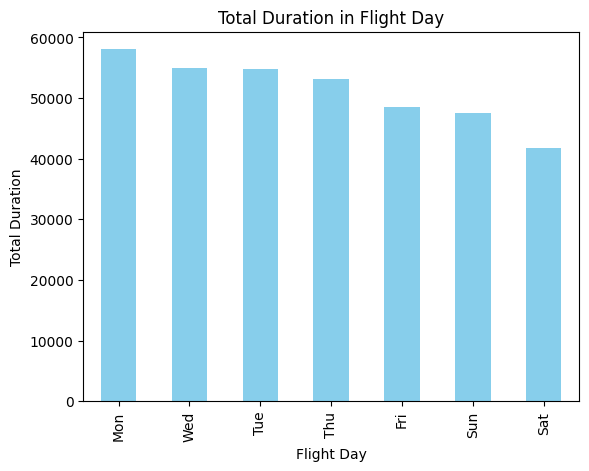

In [147]:
# Plotting
result_sorted.plot(kind='bar', x='flight_day', y='flight_duration', color='skyblue', legend=False)
plt.title('Total Duration in Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Total Duration')
plt.show()

In [148]:
# booking_origin with purchase_lead
cb.groupby('booking_origin').sum()['purchase_lead'].reset_index()

<ipython-input-148-b6d46bc80c99>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('booking_origin').sum()['purchase_lead'].reset_index()


,booking_origin,purchase_lead
0,(not set),6165
1,Afghanistan,191
2,Algeria,27
3,Argentina,482
4,Australia,1389688
...,...,...
99,United Arab Emirates,2349
100,United Kingdom,13602
101,United States,31655
102,Vanuatu,11


In [149]:
# Using sort function to get values orderly
result = cb.groupby('booking_origin').sum()['purchase_lead'].reset_index()
result_sorted = result.sort_values(by='purchase_lead', ascending=False)
print(result_sorted.head(7))

   booking_origin  purchase_lead
4       Australia        1389688
51       Malaysia         613607
85    South Korea         410486
43          Japan         304854
37      Indonesia         283311
17          China         263100
93       Thailand         237114


<ipython-input-149-81556e7b4f52>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = cb.groupby('booking_origin').sum()['purchase_lead'].reset_index()


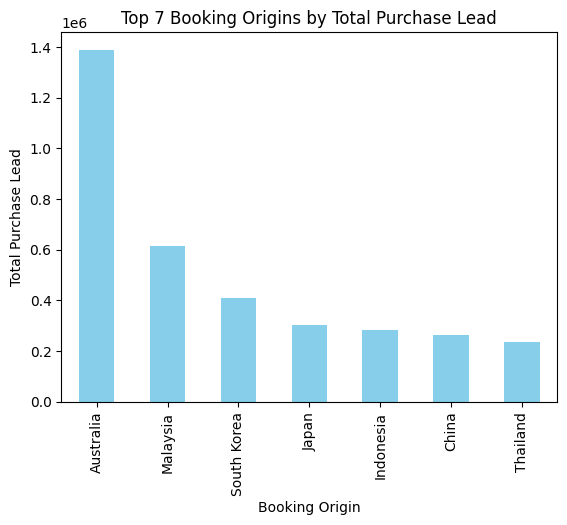

In [150]:
# Select the top 7 booking_origin
top_7 = result_sorted.head(7)

# Plot the top 7 booking_origin
top_7.plot(kind='bar', x='booking_origin', y='purchase_lead', color='skyblue', legend=False)
plt.title('Top 7 Booking Origins by Total Purchase Lead')
plt.xlabel('Booking Origin')
plt.ylabel('Total Purchase Lead')
plt.show()

In [151]:
# booking_origin with num_passengers
cb.groupby('booking_origin').sum()['num_passengers'].reset_index()

<ipython-input-151-2f4d356e7b11>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('booking_origin').sum()['num_passengers'].reset_index()


,booking_origin,num_passengers
0,(not set),133
1,Afghanistan,1
2,Algeria,1
3,Argentina,9
4,Australia,25589
...,...,...
99,United Arab Emirates,60
100,United Kingdom,257
101,United States,647
102,Vanuatu,1


In [152]:
# Using sort function to get values orderly
result1 = cb.groupby('booking_origin').sum()['num_passengers'].reset_index()
result_sorted = result1.sort_values(by='num_passengers', ascending=False)
print(result_sorted.head(7))

   booking_origin  num_passengers
4       Australia           25589
51       Malaysia           11827
85    South Korea            7898
17          China            6791
43          Japan            5799
37      Indonesia            3966
93       Thailand            3705


<ipython-input-152-20c2db1e28a6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result1 = cb.groupby('booking_origin').sum()['num_passengers'].reset_index()


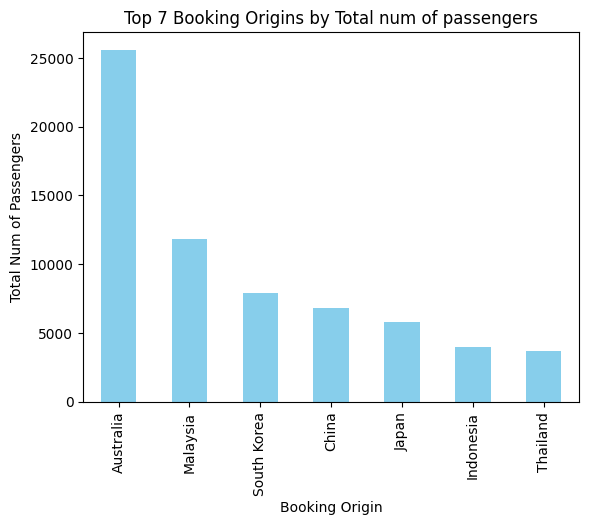

In [153]:
# Select the top 7 booking_origin
top_7 = result_sorted.head(7)

# Plot the top 7 booking_origin
top_7.plot(kind='bar', x='booking_origin', y='num_passengers', color='skyblue', legend=False)
plt.title('Top 7 Booking Origins by Total num of passengers')
plt.xlabel('Booking Origin')
plt.ylabel('Total Num of Passengers')
plt.show()

In [154]:
# booking_origin with length_of_stay
cb.groupby('booking_origin').sum()['length_of_stay'].reset_index()

<ipython-input-154-f13bc603eef1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('booking_origin').sum()['length_of_stay'].reset_index()


,booking_origin,length_of_stay
0,(not set),1405
1,Afghanistan,2
2,Algeria,6
3,Argentina,164
4,Australia,515419
...,...,...
99,United Arab Emirates,1104
100,United Kingdom,4134
101,United States,8362
102,Vanuatu,4


In [155]:
# Using sort function to get values orderly
result1 = cb.groupby('booking_origin').sum()['length_of_stay'].reset_index()
result_sorted = result1.sort_values(by='length_of_stay', ascending=False)
print(result_sorted.head(7))

   booking_origin  length_of_stay
4       Australia          515419
51       Malaysia          173362
85    South Korea           69443
43          Japan           50497
17          China           44339
36          India           39709
91         Taiwan           39548


<ipython-input-155-6393ce3f8c77>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result1 = cb.groupby('booking_origin').sum()['length_of_stay'].reset_index()


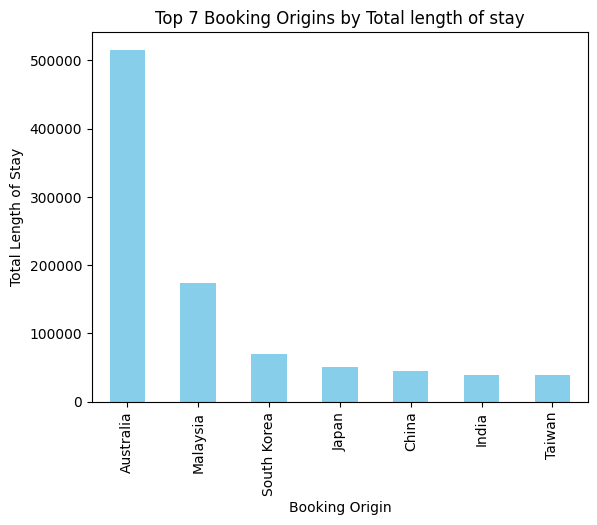

In [156]:
# Select the top 7 booking_origin
top_7 = result_sorted.head(7)

# Plot the top 7 booking_origin
top_7.plot(kind='bar', x='booking_origin', y='length_of_stay', color='skyblue', legend=False)
plt.title('Top 7 Booking Origins by Total length of stay')
plt.xlabel('Booking Origin')
plt.ylabel('Total Length of Stay')
plt.show()

In [157]:
# booking_origin with flight_hour
cb.groupby('booking_origin').sum()['flight_hour'].reset_index()

<ipython-input-157-d8934d195899>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('booking_origin').sum()['flight_hour'].reset_index()


,booking_origin,flight_hour
0,(not set),694
1,Afghanistan,16
2,Algeria,2
3,Argentina,119
4,Australia,154558
...,...,...
99,United Arab Emirates,464
100,United Kingdom,2316
101,United States,4465
102,Vanuatu,21


In [158]:
# Using sort function to get values orderly
result1 = cb.groupby('booking_origin').sum()['flight_hour'].reset_index()
result_sorted = result1.sort_values(by='flight_hour', ascending=False)
print(result_sorted.head(7))

   booking_origin  flight_hour
4       Australia       154558
51       Malaysia        60769
85    South Korea        40116
43          Japan        37376
17          China        29616
37      Indonesia        20574
91         Taiwan        19942


<ipython-input-158-994139b75ab3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result1 = cb.groupby('booking_origin').sum()['flight_hour'].reset_index()


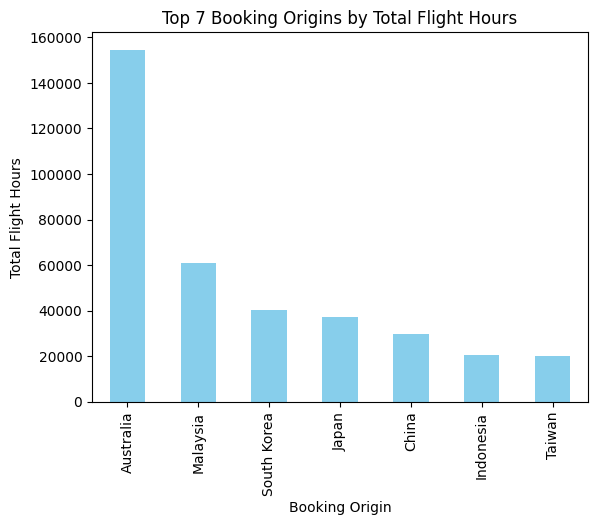

In [159]:
# Select the top 7 booking_origin
top_7 = result_sorted.head(7)

# Plot the top 7 booking_origin
top_7.plot(kind='bar', x='booking_origin', y='flight_hour', color='skyblue', legend=False)
plt.title('Top 7 Booking Origins by Total Flight Hours')
plt.xlabel('Booking Origin')
plt.ylabel('Total Flight Hours')
plt.show()

In [160]:
# booking_origin with flight_hour
cb.groupby('booking_origin').sum()['flight_duration'].reset_index()

<ipython-input-160-df5a58b97b51>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb.groupby('booking_origin').sum()['flight_duration'].reset_index()


,booking_origin,flight_duration
0,(not set),526.60
1,Afghanistan,4.75
2,Algeria,6.62
3,Argentina,45.46
4,Australia,140982.76
...,...,...
99,United Arab Emirates,323.36
100,United Kingdom,1288.99
101,United States,3116.09
102,Vanuatu,8.58


In [161]:
# Using sort function to get values orderly
result1 = cb.groupby('booking_origin').sum()['flight_duration'].reset_index()
result_sorted = result1.sort_values(by='flight_duration', ascending=False)
print(result_sorted.head(7))

   booking_origin  flight_duration
4       Australia        140982.76
51       Malaysia         48515.30
85    South Korea         31122.56
43          Japan         28139.57
17          China         19584.55
37      Indonesia         15758.02
93       Thailand         14628.57


<ipython-input-161-285e1b2a4bc1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result1 = cb.groupby('booking_origin').sum()['flight_duration'].reset_index()


In [163]:
cb['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

In [167]:
# To check numerical and nonnumerical columns
numeric_columns = cb.select_dtypes(include=['number']).columns
categorical_columns = cb.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')
Categorical Columns: Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')


In [166]:
# Data is categorical and numerical so we need to convert to numerical complete data to get results.

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [168]:
cb['sales_channel'] = enc.fit_transform(cb['sales_channel'])
cb['trip_type'] = enc.fit_transform(cb['trip_type'])
cb['flight_day'] = enc.fit_transform(cb['flight_day'])
cb['route'] = enc.fit_transform(cb['route'])
cb['booking_origin'] = enc.fit_transform(cb['booking_origin'])

In [169]:
# Checking all column convert to numeric
cb.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [170]:
# Checking the correlation
cb.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.006202,0.002097,0.214999,-0.115380,0.016393,-0.002836,-0.048727,0.053137,0.120724,0.029509,0.022252,-0.062028,0.024092
sales_channel,-0.006202,1.000000,0.021065,-0.014501,-0.058197,0.023650,-0.022745,-0.020097,0.029076,-0.055956,0.029160,-0.026013,-0.036642,-0.039320
trip_type,0.002097,0.021065,1.000000,-0.008874,0.006498,-0.002848,-0.000820,-0.008887,0.002392,-0.014516,0.005340,0.011819,-0.039410,0.027251
purchase_lead,0.214999,-0.014501,-0.008874,1.000000,-0.076747,0.035112,-0.030888,-0.107474,0.047089,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.058197,0.006498,-0.076747,1.000000,-0.025525,0.003099,0.004259,-0.110038,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.023650,-0.002848,0.035112,-0.025525,1.000000,0.009639,-0.015862,0.042461,-0.010911,0.012251,0.011953,-0.003236,0.006705
flight_day,-0.002836,-0.022745,-0.000820,-0.030888,0.003099,0.009639,1.000000,0.002939,-0.000040,0.005548,-0.004677,-0.004247,-0.001202,0.009919
route,-0.048727,-0.020097,-0.008887,-0.107474,0.004259,-0.015862,0.002939,1.000000,-0.067258,0.026372,0.016367,-0.011357,-0.136428,-0.007911
booking_origin,0.053137,0.029076,0.002392,0.047089,-0.110038,0.042461,-0.000040,-0.067258,1.000000,-0.029751,-0.050991,-0.084647,-0.232650,0.130984
wants_extra_baggage,0.120724,-0.055956,-0.014516,-0.021599,0.177536,-0.010911,0.005548,0.026372,-0.029751,1.000000,0.208392,0.216835,0.057637,0.068452


In [173]:
# Find the maximum and minimum correlation values
max_corr = cb.max().max()
min_corr = cb.min().min()

print("Maximum Correlation:", max_corr)
print("Minimum Correlation:", min_corr)

Maximum Correlation: 867.0
Minimum Correlation: 0.0


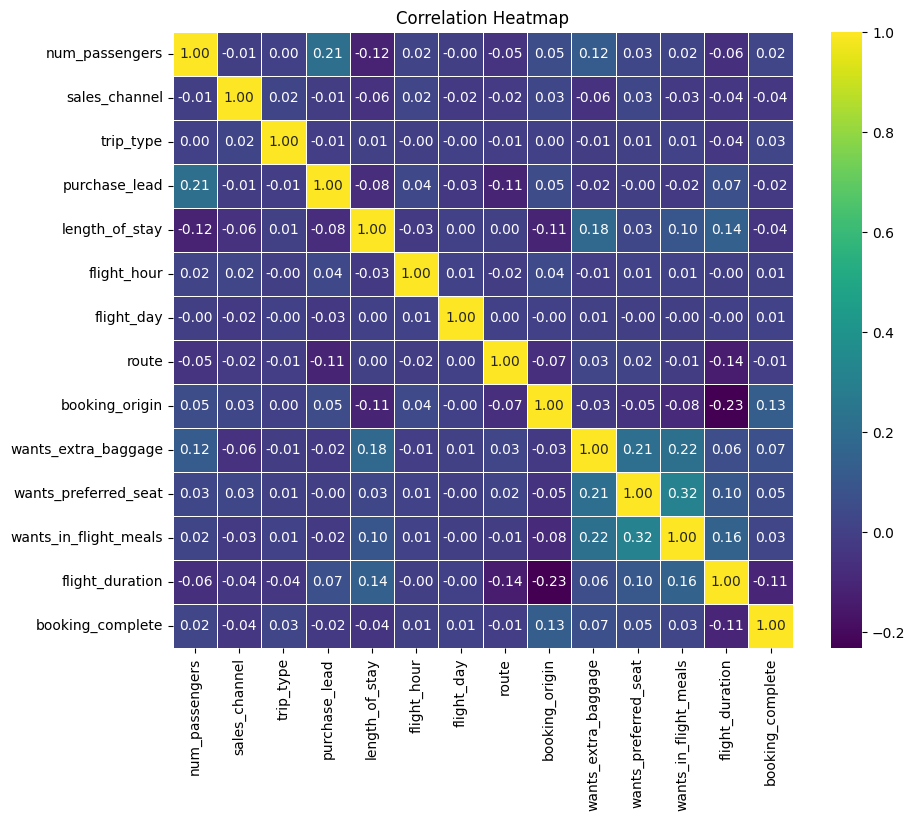

In [172]:
# Calculate correlation matrix
correlation_matrix = cb.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

((array([-4.188098  , -3.98219616, -3.86993432, ...,  3.86993432,
          3.98219616,  4.188098  ]),
  array([1, 1, 1, ..., 9, 9, 9])),
 (0.800312537368687, 1.5901868874414071, 0.7872345836554242))

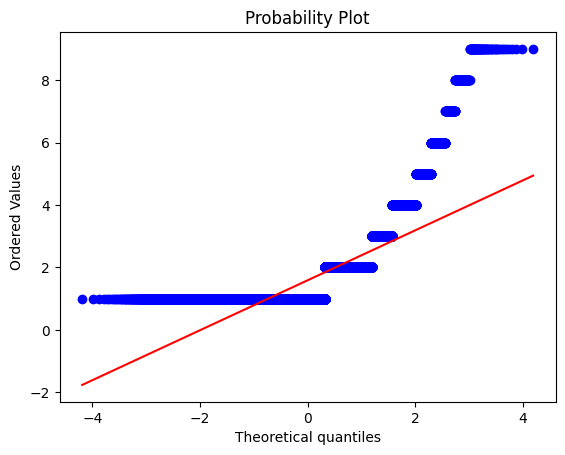

In [175]:
# Transformation

import scipy.stats as stats
import pylab

stats.probplot(cb['num_passengers'], dist='norm', plot=pylab)

<ipython-input-179-6f52c77a09ac>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cb['num_passengers'], hist=False, kde=True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-179-6f52c77a09ac>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) o

Lamda value used for Transformation : -1.9067994071748626


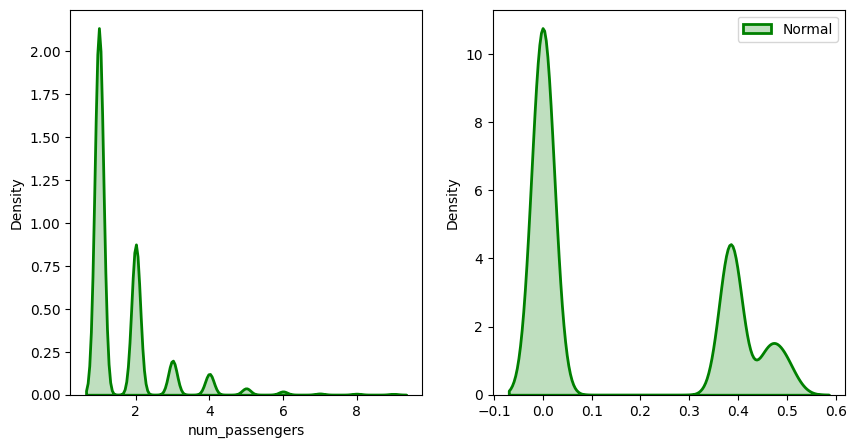

In [179]:
# creating a model

fitted_data, fitted_lambda = stats.boxcox(cb['num_passengers'])

fig, ax = plt.subplots(1, 2)

sns.distplot(cb['num_passengers'], hist=False, kde=True,
             kde_kws={'shade' : True, 'linewidth' : 2},
             label = 'Non-Normal', color = 'green', ax = ax[0])


sns.distplot(fitted_data, hist=False, kde=True,
             kde_kws={'shade' : True, 'linewidth' : 2},
             label = 'Normal', color = 'green', ax = ax[1])

plt.legend(loc = 'upper right')

fig.set_figheight(5)
fig.set_figwidth(10)


print(f"Lamda value used for Transformation : {fitted_lambda}")

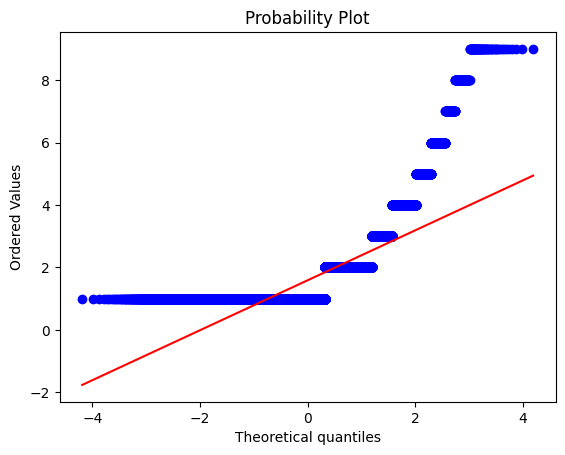

In [181]:
# YeoJhonson Transformation

prob = stats.probplot(cb['num_passengers'], dist = stats.norm, plot=pylab)

In [183]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

df = minmax.fit_transform(cb,)

dataset = pd.DataFrame(df)

MinMax_res = dataset.describe()

In [184]:
MinMax_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,0.073773,0.108845,0.993730,0.097720,0.029632,0.394377,0.511401,0.491621,0.371355,0.668229,0.295631,0.426635,0.540367,0.149977
std,0.127067,0.311448,0.065366,0.104279,0.043486,0.235352,0.338454,0.284800,0.318308,0.470854,0.456331,0.494593,0.309812,0.357052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.024221,0.006427,0.217391,0.166667,0.254386,0.038835,0.000000,0.000000,0.000000,0.196687,0.000000
50%,0.000000,0.000000,1.000000,0.058824,0.021851,0.391304,0.500000,0.478697,0.359223,1.000000,0.000000,0.000000,0.600414,0.000000
75%,0.125000,0.000000,1.000000,0.132641,0.035990,0.565217,0.833333,0.765664,0.563107,1.000000,1.000000,1.000000,0.861284,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing

In [232]:
# Selecting for model
X = cb.drop(columns=['booking_complete'])
y = cb['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (not always necessary, depends on the algorithm)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [233]:
X_train_scaled

array([[ 2.35907944, -0.34746553,  0.09801518, ..., -0.64674767,
        -0.86190626, -0.63369951],
       [ 0.40008274, -0.34746553,  0.09801518, ..., -0.64674767,
        -0.86190626,  1.03724431],
       [ 0.40008274, -0.34746553,  0.09801518, ..., -0.64674767,
        -0.86190626, -1.10824756],
       ...,
       [ 1.37958109, -0.34746553,  0.09801518, ..., -0.64674767,
        -0.86190626,  0.19508863],
       [ 0.40008274, -0.34746553,  0.09801518, ..., -0.64674767,
         1.16021897,  1.03724431],
       [ 0.40008274, -0.34746553,  0.09801518, ..., -0.64674767,
        -0.86190626,  1.03724431]])

In [234]:
X_test_scaled

array([[-0.57941561, -0.34746553,  0.09801518, ..., -0.64674767,
         1.16021897,  1.03724431],
       [ 0.40008274, -0.34746553,  0.09801518, ..., -0.64674767,
        -0.86190626,  1.03724431],
       [-0.57941561, -0.34746553,  0.09801518, ..., -0.64674767,
         1.16021897, -1.10824756],
       ...,
       [-0.57941561, -0.34746553,  0.09801518, ...,  1.54619807,
         1.16021897,  0.87014993],
       [-0.57941561, -0.34746553,  0.09801518, ..., -0.64674767,
        -0.86190626, -0.43987003],
       [ 1.37958109,  2.8779833 ,  0.09801518, ..., -0.64674767,
        -0.86190626, -1.74320621]])

## Model Training and Evaluation

In [235]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.8499543471644516
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8378
           1       0.00      0.00      0.00      1479

    accuracy                           0.85      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8299685502688445
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8378
           1       0.31      0.11      0.16      1479

    accuracy                           0.83      9857
   macro avg       0.58      0.53      0.53      9857
weighted avg       0.78      0.83      0.79      9857



In [237]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7755909505934868
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8378
           1       0.28      0.31      0.29      1479

    accuracy                           0.78      9857
   macro avg       0.58      0.58      0.58      9857
weighted avg       0.79      0.78      0.78      9857



In [238]:
# Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train_scaled, y_train)
y_pred_forest = forest_model.predict(X_test_scaled)

# Evaluate Random Forest model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)
print(classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.8525920665516892
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8378
           1       0.55      0.10      0.17      1479

    accuracy                           0.85      9857
   macro avg       0.70      0.54      0.54      9857
weighted avg       0.81      0.85      0.81      9857



In [239]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8463021203205844
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8378
           1       0.45      0.12      0.18      1479

    accuracy                           0.85      9857
   macro avg       0.66      0.55      0.55      9857
weighted avg       0.80      0.85      0.81      9857



##Prediction

In [240]:
prediction = forest_model.predict(X_test_scaled)
print("Prediction:", prediction)

Prediction: [0 0 0 ... 0 0 0]


In [256]:
prediction[88]

0

In [251]:
forest_model.score(X_test_scaled, y_test)

0.8525920665516892

In [248]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_forest)
cnf_matrix

array([[8258,  120],
       [1333,  146]])

In [257]:
# Check if there is any 1 in the prediction array
if 1 in prediction:
    print("At least one instance is predicted as 1 (booking)")
else:
    print("No instance is predicted as 1 (booking)")


At least one instance is predicted as 1 (booking)


### This confusion matrix indicates that the model has made correct predictions (8258 true negatives and 146 true positives) but also some incorrect predictions (120 false positives and 1333 false negatives). The instances with a predicted value of 1 correspond to the positive class (booking), and the model has identified at least one such instance in your test dataset.

In [262]:
correlation_matrix = pd.DataFrame(correlation_matrix)

In [263]:
correlation_matrix

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.006202,0.002097,0.214999,-0.115380,0.016393,-0.002836,-0.048727,0.053137,0.120724,0.029509,0.022252,-0.062028,0.024092
sales_channel,-0.006202,1.000000,0.021065,-0.014501,-0.058197,0.023650,-0.022745,-0.020097,0.029076,-0.055956,0.029160,-0.026013,-0.036642,-0.039320
trip_type,0.002097,0.021065,1.000000,-0.008874,0.006498,-0.002848,-0.000820,-0.008887,0.002392,-0.014516,0.005340,0.011819,-0.039410,0.027251
purchase_lead,0.214999,-0.014501,-0.008874,1.000000,-0.076747,0.035112,-0.030888,-0.107474,0.047089,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.058197,0.006498,-0.076747,1.000000,-0.025525,0.003099,0.004259,-0.110038,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.023650,-0.002848,0.035112,-0.025525,1.000000,0.009639,-0.015862,0.042461,-0.010911,0.012251,0.011953,-0.003236,0.006705
flight_day,-0.002836,-0.022745,-0.000820,-0.030888,0.003099,0.009639,1.000000,0.002939,-0.000040,0.005548,-0.004677,-0.004247,-0.001202,0.009919
route,-0.048727,-0.020097,-0.008887,-0.107474,0.004259,-0.015862,0.002939,1.000000,-0.067258,0.026372,0.016367,-0.011357,-0.136428,-0.007911
booking_origin,0.053137,0.029076,0.002392,0.047089,-0.110038,0.042461,-0.000040,-0.067258,1.000000,-0.029751,-0.050991,-0.084647,-0.232650,0.130984
wants_extra_baggage,0.120724,-0.055956,-0.014516,-0.021599,0.177536,-0.010911,0.005548,0.026372,-0.029751,1.000000,0.208392,0.216835,0.057637,0.068452


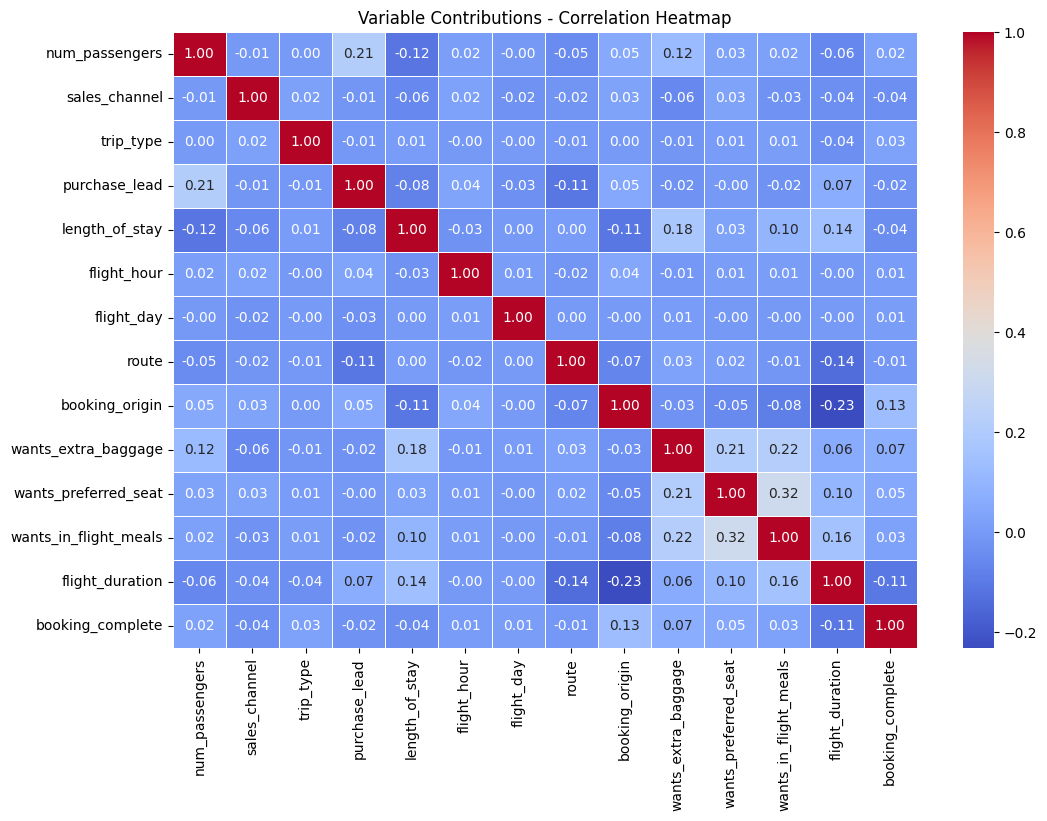

In [258]:
# Setting up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title and display the plot
plt.title('Variable Contributions - Correlation Heatmap')
plt.show()


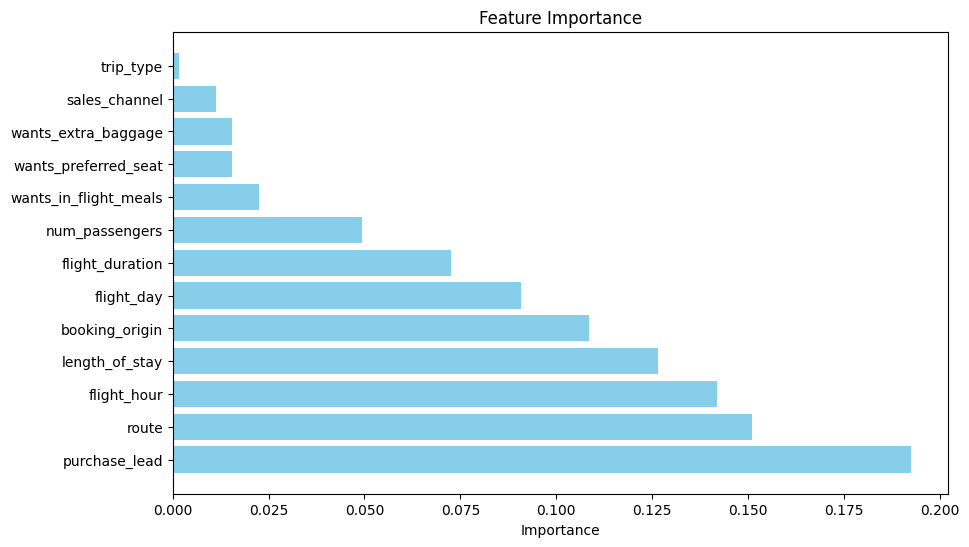

In [264]:
import matplotlib.pyplot as plt
importances = forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()